# Data Utilities

Some python scripts for munging dictionaries and other data tasks.


In [2]:
# Global imports

import re
import json
import csv

DATA_DIR = '../data';

In [3]:
alpha_only = re.compile(r'[a-zA-Z]+')

def get_words(dict_file_name):
  with open(f"{DATA_DIR}/{dict_file_name}", encoding='latin-1', mode='r') as f:
    words = f.read().splitlines()

  print(f"{len(words):,} words read from {dict_file_name}")

  words = [word.lower() for word in words if alpha_only.match(word)]
  print(f"... {len(words):,} are alpha only")

  words = [word for word in words if len(word) == 5]
  print(f"... {len(words):,} are 5 letters long\n")

  return set(words)

In [4]:
dictionary = get_words('dict.txt')
usa = get_words('usa2.txt')
english = get_words('english3.txt')
wordle_solutions = get_words('wordle_solutions.txt')
wordle_dict = get_words('wordle_complete_dictionary.txt')

# Confirm all solutions are IN the complete dictionary!
present = wordle_solutions.intersection(wordle_dict)
print(f"{len(present):,} solutions are in the complete dictionary")


42,700 words read from dict.txt
... 42,697 are alpha only
... 4,430 are 5 letters long

77,722 words read from usa2.txt
... 77,718 are alpha only
... 5,442 are 5 letters long

194,433 words read from english3.txt
... 194,433 are alpha only
... 11,435 are 5 letters long

2,315 words read from wordle_solutions.txt
... 2,315 are alpha only
... 2,315 are 5 letters long

12,897 words read from wordle_complete_dictionary.txt
... 12,897 are alpha only
... 12,897 are 5 letters long

2,315 solutions are in the complete dictionary


In [5]:
# My dictionary missing many words!
# isect = dictionary.intersection(usa)
isect = usa.intersection(english)
print(f"{len(isect):,} words in usa ISECT english")

5,282 words in usa ISECT english


In [6]:
# Use the same dictionaries as used in Wordle.

with open(f'{DATA_DIR}/words.json', 'w') as f:
  json.dump(sorted(wordle_dict), f, indent=2)

with open(f'{DATA_DIR}/solutions.json', 'w') as f:
  json.dump(sorted(wordle_solutions), f, indent=2)

In [7]:
# Write a json file with this cleanup up dictionary
# import json

# with open(f'{DATA_DIR}/words.json', 'w') as f:
#   json.dump(sorted(isect), f, indent=2)


# Test Words

In [8]:
words = []

with open(f"{DATA_DIR}/darrellp.csv", 'r') as f:
  reader = csv.reader(f)
  words = [row[0] for row in reader]

print(f"{len(words):,} words read from darrellp.csv")

with open(f"{DATA_DIR}/test-words.json", 'w') as f:
  json.dump(words, f, indent=2)

722 words read from darrellp.csv


# Evaluate Test Results

In [9]:
def analyze_results(file_name):
  hist = dict()

  with open(f"{DATA_DIR}/{file_name}", 'r') as f:
    reader = csv.reader(f)
    results = [row for row in reader]
  
  scores = [row[2] for row in results]

  samples = len(scores)

  num_scores = [int(score) for score in scores if score.isnumeric()]

  worst_score = max(num_scores)
  
  print(f"\n{file_name} average: {sum(num_scores) / len(num_scores):.2f} " +
    f"maximum: {worst_score} " +
    f"over {len(num_scores):,} scores")

  hardest_words = [row[0] for row in results if row[2] == str(worst_score)]
  print(f"Hardest words: {', '.join(hardest_words)}")

  for row in results:
    score = row[2]
    if not score.isnumeric():
      continue;

    hist[score] = hist.get(score, 0) + 1

  print("Histogram of guess counts:")
  for score in sorted(hist.keys()):
    print(f"{score}: {hist[score]:,}")


In [10]:
analyze_results('darrellp.csv')
analyze_results('mckoss.csv')
analyze_results('sample.csv')
analyze_results('all-solutions.csv')
analyze_results('all-expectations.csv')
analyze_results('half-expectation.csv')
analyze_results('opt-worst-case.csv')



darrellp.csv average: 4.18 maximum: 10 over 722 scores
Hardest words: wears
Histogram of guess counts:
1: 1
10: 1
2: 18
3: 219
4: 263
5: 124
6: 60
7: 17
8: 11
9: 8

mckoss.csv average: 3.54 maximum: 6 over 365 scores
Hardest words: punch, witty
Histogram of guess counts:
2: 17
3: 166
4: 152
5: 28
6: 2

sample.csv average: 3.54 maximum: 6 over 100 scores
Hardest words: punch, gooey
Histogram of guess counts:
2: 5
3: 46
4: 41
5: 6
6: 2

all-solutions.csv average: 3.53 maximum: 6 over 2,315 scores
Hardest words: gooey, greed, jolly, merry, pitch, power, punch, tight, vaunt, witty, wreak
Histogram of guess counts:
1: 1
2: 104
3: 1,058
4: 978
5: 163
6: 11

all-expectations.csv average: 3.67 maximum: 5 over 2,315 scores
Hardest words: badly, berry, bigot, booby, booty, boxer, buggy, bunny, daddy, dilly, fanny, fever, fewer, fifty, fight, finch, fixer, fizzy, flank, flung, flunk, foggy, folly, found, freak, freer, frown, funky, funny, fuzzy, gland, goner, goody, grave, graze, green, grown, g

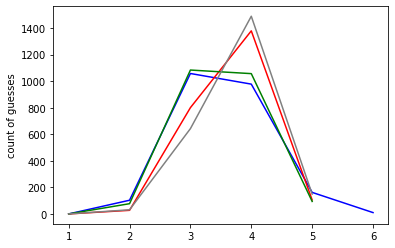

In [14]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5,6], [1, 104, 1058, 978, 163, 11], 'blue')
plt.plot([1,2,3,4,5], [1, 28, 801, 1379, 106], 'red')
plt.plot([1,2,3,4,5], [1, 78, 1084, 1057, 95], 'green')
plt.plot([1,2,3,4,5], [1, 32, 643, 1489, 150], 'grey')
plt.ylabel('count of guesses')
plt.show()

# Example changes

Here - we just got a "lucky guess":

badly:
- old: raise!-(91-E5.5-M15-S21)-cyton-(15-E1.9-M4-S9)-badly!
- new: raise!-(91-E5.5-M15-S21)-cyton-(15-E1.7-M3-S8)-godly-(2-E1.0-M1-S2)-abaca-(1-E1.0-M1-S1)-badly!

One of the "hard words" - got "easier":

gooey:
- old: raise!-(121-E5.0-M14-S20)-betel!-(14-E1.7-M3-S7)-women!-(3-E1.7-M2-S1)-covey!-(2-E1.0-M1-S2)-dopey!-(1-E1.0-M1-S1)-gooey!
- new: raise!-(121-E4.0-M9-S20)-denet-(6-E1.0-M1-S6)-anvil-(1-E1.0-M1-S1)-gooey!
